### 3.2 Again, but make a movie! -- left over code from playing around with animation
from matplotlib.animation import FuncAnimation 

#set simulation time 
dt = 0.1
t0 = 0; tf = 10
t_vals = np.arange(t0,tf+dt,dt)

#set random initial conditions
x_prev = np.random.uniform(low=-1,high=1,size=64)

#setup plot 
fig, ax = plt.subplots()
mat = ax.matshow(x_prev.reshape(8,8), cmap='magma') 
time_text = ax.text(0.05, 0.95, '', transform=ax.transAxes, color='white')


#frame update 
def update(frame): 
    global x_prev 
    x_next = euler(x_prev, W, dt, sigma)
    x_prev = x_next    
    mat.set_data(x_prev.reshape(8,8)) 
    
    # Update time text
    time_text.set_text('Time = {:.1f}s'.format(frame * dt))
    
    return mat, time_text

#create animation
ani = FuncAnimation(fig,update,frames=len(t_vals), blit=True) 
ani.save('dynamics1.mp4', writer='ffmpeg', fps=10)
plt.show()

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

# Functions I will need 
#creates weight matrix to store pattern p
def pattern(p, plot = True): 
    p = p.reshape(-1, 1)       
    return p @ p.T / len(p) 

#sign function 
def f(s): 
    return np.sign(s)

#derivative of x 
def dx(x, W, sigma = 0.1):
    noise = sigma*np.random.normal(loc=0,scale=1,size=len(x))  
    return -x + f(W @ x)+noise 

#Euler Step
def euler(x,W,dt=0.1,sigma=0.1): 
    return x+dx(x,W,sigma)*dt 
    

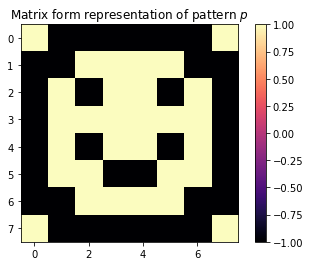

In [7]:
# 3.1 Invent a pattern 

#to start, let's make a checker-board pattern 
p1 = np.tile([-1,1], 4); p2 = np.tile([1,-1], 4)
p = np.concatenate((p1,p2,p1,p2,p1,p2,p1,p2),axis=0)

#we also create a smiley face pattern 
#use zeros and ones to start b/c easier to visuzlize 
q1 = np.array([1, 0, 0, 0, 0, 0, 0, 1])
q2 = np.array([0, 0, 1, 1, 1, 1, 0, 0])
q3 = np.array([0, 1, 0, 1, 1, 0, 1, 0])
q4 = np.array([0, 1, 1, 1, 1, 1, 1, 0])
q5 = np.array([0, 1, 0, 1, 1, 0, 1, 0])
q6 = np.array([0, 1, 1, 0, 0, 1, 1, 0])
q7 = np.array([0, 0, 1, 1, 1, 1, 0, 0])
q8 = np.array([1, 0, 0, 0, 0, 0, 0, 1])
q = np.concatenate((q1,q2,q3,q4,q5,q6,q7,q8),axis=0)
q[q==0]=-1


#reshape for visualization 
q_matrix = q.reshape(8,8) 

#plot pattern
plt.imshow(q_matrix, cmap = 'magma')
plt.title("Matrix form representation of pattern $p$")
plt.colorbar()
plt.savefig("figures/smiley.png",dpi=500)

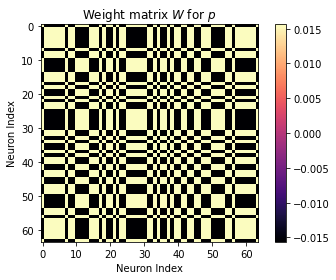

In [8]:
# 3.2 plot W and simulate the dynamics 

#compute W 
W = pattern(q) 

#visualize W 
plt.imshow(W, cmap = 'magma')
plt.title("Weight matrix $W$ for $p$")
plt.xlabel("Neuron Index"); plt.ylabel("Neuron Index")
plt.colorbar()
plt.savefig("figures/Wsmiley.png",dpi=500)
plt.show()

[0.         0.57142857 1.14285714 1.71428571 2.28571429 2.85714286
 3.42857143 4.        ]


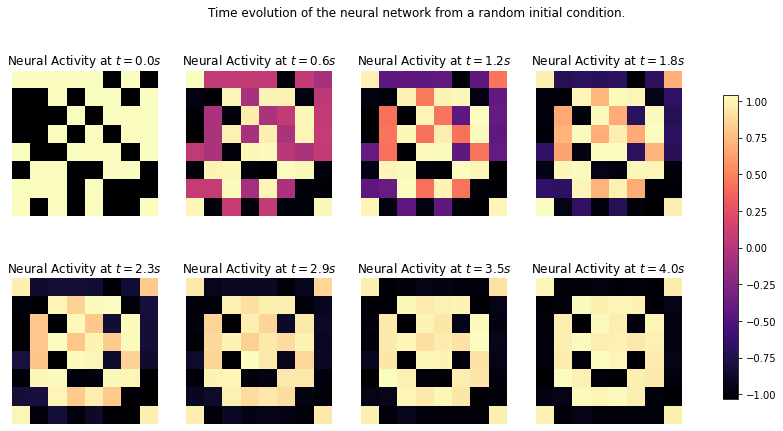

In [38]:
# 3.2 Continue Simulate the Dynamics 
#initialize 
sigma=0.1 

#set simulation time 
dt = 0.1 
t0 = 0; tf = 4
t_vals = np.arange(t0,tf+dt,dt)
t_save=np.linspace(t0,tf,8) 
print(t_save)

#set random initial conditions
np.random.seed(4)
x_next = np.random.choice([-1,1], size=64, p=[0.5,0.5]) 

#initialize plots 
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 7))
axes = axes.flatten()

#euler step through equation 
for i,t in enumerate(t_vals): 
    
    #visualize 
    if np.abs(t_save - t).min() < 0.1: 
        index = (np.abs(t_save - t)).argmin()
        ax = axes[index]  
        x_matrix = x_next.reshape(8, 8)
        im = ax.imshow(x_matrix, cmap='magma')
        ax.set_title(f"Neural Activity at $t={t:.1f}s$")
        ax.axis('off') 
        
    #prepare next loop 
    x_prev = x_next
    #take euler step
    x_next = euler(x_prev, W, dt, sigma)
    
fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.8)
fig.suptitle("Time evolution of the neural network from a random initial condition.")
plt.savefig("figures/dynamics_all.png",dpi=500)
plt.show()

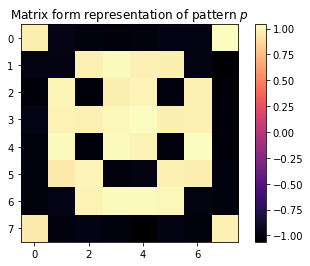

In [41]:
# 3.3 Run Simulation A Few Times 
p_ctr = 0 
inv_p_ctr = 0 
hmm_ctr = 0 # in case it converges to something else 
dt = 0.1 
t0 = 0; tf = 10
N = 1
t_vals = np.arange(t0,tf+dt,dt)

for i in range(N):
    #set random initial conditions
    x_prev = np.random.choice([-1,1], size=64, p=[0.5,0.5]) 
    
    #euler step through equation 
    for t in t_vals: 

        #take euler step
        x_next = euler(x_prev, W, dt, sigma)

        #visualize 
        x_matrix = x_next.reshape(8,8)
        plt.imshow(x_matrix, cmap = 'magma')     
        #plt.show()

        #prepare next loop 
        x_prev = x_next
        
    #increase counters 
    if abs(np.sqrt(np.sum((q - x_next)**2))) < 0.5:
        p_ctr += 1 
        if p_ctr == 1: 
            plt.imshow(x_matrix, cmap='magma')
            plt.title("Matrix form representation of pattern $p$")
            plt.colorbar()
            plt.savefig("figures/realsmiley.png")
           
    elif abs(np.sqrt(np.sum((-q - x_next)**2))) < 0.5:
        inv_p_ctr  += 1
        if inv_p_ctr == 1:
            plt.imshow(x_matrix, cmap='magma')
            plt.title("Matrix form representation of pattern $p$")
            plt.colorbar()
            plt.savefig("figures/invsmiley.png")
    else:
        hmm_ctr+=1 
        print("WTF")
        plt.imshow(x_matrix, cmap='magma')
        plt.show()
#Answer: p and -p 

In [42]:
print(p_ctr, inv_p_ctr, hmm_ctr) 

1 0 0


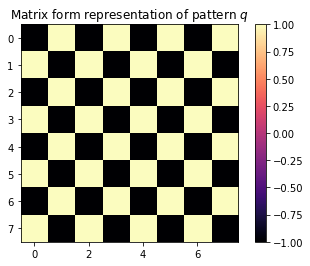

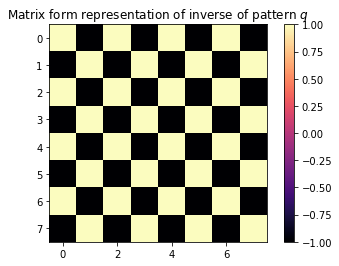

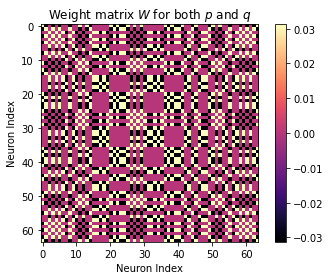

In [43]:
#3.4 Introduce a new pattern 

#mushroom pattern 
#use zeros and ones to start b/c easier to visuzlize 
q1 = np.array([1, 0, 0, 0, 0, 0, 0, 1])
q2 = np.array([0, 0, 1, 1, 1, 1, 0, 0])
q3 = np.array([0, 1, 0, 1, 1, 0, 1, 0])
q4 = np.array([0, 1, 1, 1, 1, 1, 1, 0])
q5 = np.array([0, 1, 0, 1, 1, 0, 1, 0])
q6 = np.array([0, 1, 1, 0, 0, 1, 1, 0])
q7 = np.array([0, 0, 1, 1, 1, 1, 0, 0])
q8 = np.array([1, 0, 0, 0, 0, 0, 0, 1])
q = np.concatenate((q1,q2,q3,q4,q5,q6,q7,q8),axis=0)
q[q==0]=-1

#vizualize patter
p_matrix = p.reshape(8,8)
plt.imshow(p_matrix,cmap='magma')
plt.title("Matrix form representation of pattern $q$")
plt.colorbar()
plt.savefig("figures/check.png",dpi=500)
plt.show()

#vizualize inverse patter
p_matrix = p.reshape(8,8)
plt.imshow(-p_matrix,cmap='magma')
plt.title("Matrix form representation of inverse of pattern $q$")
plt.colorbar()
plt.savefig("figures/invcheck.png",dpi=500)
plt.show()

#compute and viz W 
p_col = p.reshape(-1, 1);q_col = q.reshape(-1, 1);      
W = (p_col@p_col.T + q_col@q_col.T)/len(p) 

#viz W 
plt.imshow(W, cmap = 'magma')
plt.title("Weight matrix $W$ for both $p$ and $q$")
plt.colorbar()
plt.xlabel("Neuron Index"); plt.ylabel("Neuron Index")
plt.savefig("figures/smicheck.png",dpi=500)
plt.show()

[0.         0.57142857 1.14285714 1.71428571 2.28571429 2.85714286
 3.42857143 4.        ]


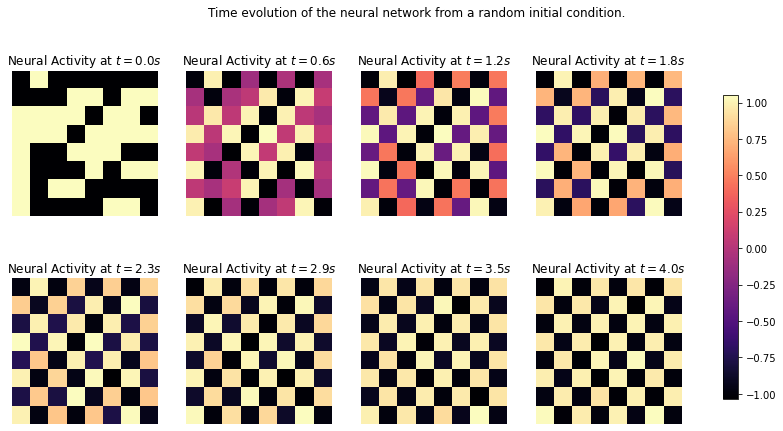

In [44]:
# 3.4 Continued Simulate the Dynamics 
#initialize 
sigma=0.1 

#set simulation time 
dt = 0.1 
t0 = 0; tf = 4
t_vals = np.arange(t0,tf+dt,dt)
t_save=np.linspace(t0,tf,8) 
print(t_save)

#set random initial conditions
np.random.seed(9)
x_next = np.random.choice([-1,1], size=64, p=[0.5,0.5]) 

#initialize plots 
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 7))
axes = axes.flatten()

#euler step through equation 
for i,t in enumerate(t_vals): 
    
    #visualize 
    if np.abs(t_save - t).min() < 0.1: 
        index = (np.abs(t_save - t)).argmin()
        ax = axes[index]  
        x_matrix = x_next.reshape(8, 8)
        im = ax.imshow(x_matrix, cmap='magma')
        ax.set_title(f"Neural Activity at $t={t:.1f}s$")
        ax.axis('off') 
        
    #prepare next loop 
    x_prev = x_next
    #take euler step
    x_next = euler(x_prev, W, dt, sigma)
    
fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.8)
fig.suptitle("Time evolution of the neural network from a random initial condition.")
plt.savefig("figures/dynamics_all2.png",dpi=500)
plt.show()

0 0 0 1


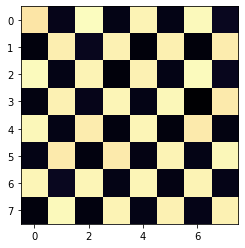

In [49]:
# 3.3 Run Simulation A Few Times 

### Runs simulation N times from random IC -- keeps pattern recovery scores
p_ctr = 0 
inv_p_ctr = 0 
q_ctr = 0 
inv_q_ctr = 0 
hmm_ctr = 0 # in case it converges to something else 
dt = 0.1 
t0 = 0; tf = 10
N = 1
t_vals = np.arange(t0,tf+dt,dt)

for i in range(N):
    #set random initial conditions
    x_prev = np.random.choice([-1,1], size=64, p=[0.5,0.5]) 
    
    #euler step through equation 
    for t in t_vals: 

        #take euler step
        x_next = euler(x_prev, W, dt, sigma)

        #visualize 
        x_matrix = x_next.reshape(8,8)
        plt.imshow(x_matrix, cmap = 'magma')     
        #plt.show()

        #prepare next loop 
        x_prev = x_next
        
    #increase counters 
    if abs(np.sqrt(np.sum((q - x_next)**2))) < 0.5:
        p_ctr += 1 
    elif abs(np.sqrt(np.sum((-q - x_next)**2))) < 0.5:
        inv_p_ctr  += 1
    elif abs(np.sqrt(np.sum((p - x_next)**2))) < 0.5:
        q_ctr += 1 
    elif abs(np.sqrt(np.sum((-p - x_next)**2))) < 0.5:
        inv_q_ctr  += 1
    else:
        hmm_ctr+=1 
        print("WTF")
        plt.imshow(x_matrix, cmap='magma')
        plt.show()

print(p_ctr,inv_p_ctr,q_ctr,inv_q_ctr)

[0.         0.57142857 1.14285714 1.71428571 2.28571429 2.85714286
 3.42857143 4.        ]


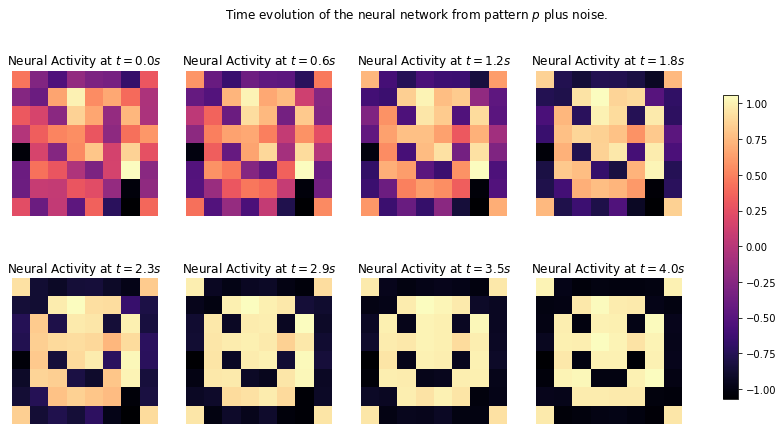

In [47]:
#3.5  Initial Conditions 
#set random initial conditions

#set simulation time 
dt = 0.1 
t0 = 0; tf = 4
t_vals = np.arange(t0,tf+dt,dt)
t_save=np.linspace(t0,tf,8) 
print(t_save)

#set random initial conditions
np.random.seed(9)
x_next = q + np.random.normal(loc=0,scale=1, size=64) 

#initialize plots 
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 7))
axes = axes.flatten()

#euler step through equation 
for i,t in enumerate(t_vals): 
    
    #visualize 
    if np.abs(t_save - t).min() < 0.1: 
        index = (np.abs(t_save - t)).argmin()
        ax = axes[index]  
        x_matrix = x_next.reshape(8, 8)
        im = ax.imshow(x_matrix, cmap='magma')
        ax.set_title(f"Neural Activity at $t={t:.1f}s$")
        ax.axis('off') 
        
    #prepare next loop 
    x_prev = x_next
    #take euler step
    x_next = euler(x_prev, W, dt, sigma)
    
fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.8)
fig.suptitle("Time evolution of the neural network from pattern $p$ plus noise.")
plt.savefig("figures/relax.png",dpi=500)
plt.show()

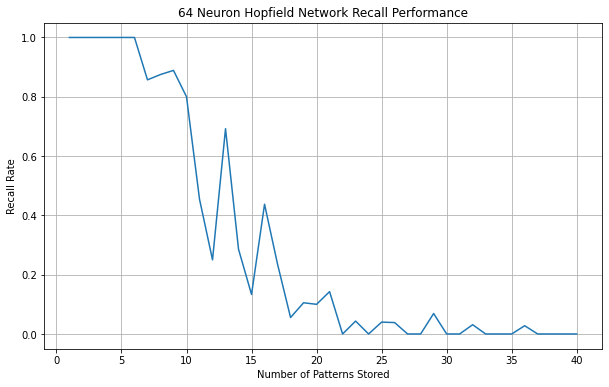

In [50]:
# 3.6 Network Capacity 
np.random.seed(2)
def Npattern(patterns): 
    #initialize
    N = len(patterns[0]) 
    W = np.zeros([N,N]) 
    #add patterns
    for p in patterns: 
        p = p.reshape(-1, 1) 
        W += p @ p.T / N
    return  W

def euler_integrate(p,W,t_vals):
    for t in t_vals: 
        p = euler(p,W)
    return p 

def network_capacity(N,M,tf=10): 
    
    #create array of length m patterns to store success rates
    recall_rate = []
    
    #initialize time
    t_vals = np.arange(0,tf,0.1)
    
    for m in range(M): 
        #create random pattersn
        rand_patterns = [np.random.choice([-1, 1], N) for x in range(m+1)]

        #create weight matrix
        W = Npattern(rand_patterns) 
        
        #recall count
        recall_count = 0 
        
        #test success of each pattern
        for p in rand_patterns: 
            p_test = p + np.random.normal(loc=0,scale=1, size=64) 
            p_test = euler_integrate(p_test,W,t_vals) 
            
            
            #check if relaxed
            if np.linalg.norm(p-p_test)<0.5: 
                recall_count+=1 
            
        recall_rate.append(recall_count/(m+1))
        
    #plot success rates
    plt.figure(figsize=(10, 6))
    plt.plot(range(1,M+1), recall_rate)
    plt.grid()
    plt.xlabel("Number of Patterns Stored")
    plt.ylabel("Recall Rate")
    plt.title("64 Neuron Hopfield Network Recall Performance")
    plt.savefig("figures/recall.png",dpi=500)

            
        
network_capacity(64,40)